In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [2]:
# Importing the dataset
dataset = pd.read_csv('dataset.csv')

# Print head and tail of the dataset
dataset

,branch_addr,taken,history
0,6ffcd6e7c25b,1,1
1,6ffcd6e7c27b,1,"1,1"
2,6ffcd6e7c275,0,"1,1,0"
3,6ffcd6e7c27b,1,"1,1,0,1"
4,6ffcd6e7c275,0,"1,1,0,1,0"
...,...,...,...
305986,6ffcc3296999,0,"1,0,0,1,1,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0"
305987,6ffcc3298e85,1,"0,0,1,1,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1"
305988,6ffcc32969c9,0,"0,1,1,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0"
305989,6ffcc3247b74,1,"1,1,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1"


In [3]:
# Check for missing values
dataset.isnull().sum() # No missing values exist

branch_addr    0
taken          0
history        0
dtype: int64

<Axes: title={'center': 'Outcome distribution'}, xlabel='taken'>

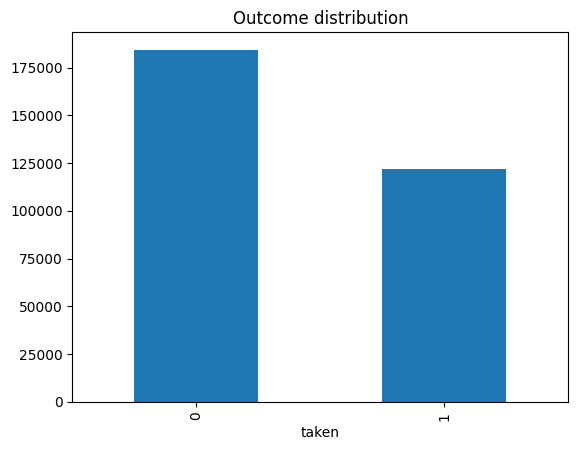

In [4]:
dataset["taken"].value_counts().plot.bar(title="Outcome distribution")

In [5]:
dataset.describe()

,taken
count,305991.000000
mean,0.397714
std,0.489427
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
# Convert 'history' column to numeric arrays
dataset['history'] = dataset['history'].str.split(',').apply(lambda x: [int(i) for i in x])

# Further processing if you need to create histogram based on individual element frequencies
# all_history_values = list(itertools.chain.from_iterable(dataset['history']))
# plt.hist(all_history_values, bins=20)
# plt.title("Distribution of History Values")
# plt.xlabel("Value")
# plt.ylabel("Frequency")
# plt.show()

In [7]:
dataset['history']

0                                                       [1]
1                                                    [1, 1]
2                                                 [1, 1, 0]
3                                              [1, 1, 0, 1]
4                                           [1, 1, 0, 1, 0]
                                ...                        
305986    [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, ...
305987    [0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, ...
305988    [0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, ...
305989    [1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, ...
305990    [1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, ...
Name: history, Length: 305991, dtype: object

In [8]:
# Add a new column named position

dataset.insert(0, 'position', range(1, len(dataset) + 1))

# Using direct assignment:
dataset['position'] = range(1, len(dataset) + 1)

In [9]:
# Split the dataset into train/test (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('taken', axis=1), dataset['taken'], test_size=0.2, random_state=None, shuffle=False)

In [10]:
y_train

0         1
1         1
2         0
3         1
4         0
         ..
244787    0
244788    0
244789    0
244790    0
244791    1
Name: taken, Length: 244792, dtype: int64

In [11]:
X_train.shape

(244792, 3)

In [12]:
X_train['branch_addr'] = X_train['branch_addr'].apply(lambda x: int(x, 16))

In [13]:
from sklearn.preprocessing import MultiLabelBinarizer

# One-hot encode the 'history' column
mlb = MultiLabelBinarizer()
history_encoded = mlb.fit_transform(X_train['history'])

# Create a new DataFrame for the encoded history
history_encoded_df = pd.DataFrame(history_encoded, columns=mlb.classes_, index=X_train.index)

# Drop the 'position', and 'history' columns and concatenate the encoded history
X_train_new = pd.concat([X_train.drop(columns=['position', 'history']), history_encoded_df], axis=1)

clf = SVC(verbose=True)          # SVC will print iteration progress itself
# clf.fit(X_train_new[:2000], y_train[:2000])

In [14]:
# One-hot encode the 'history' column
mlb = MultiLabelBinarizer()
history_encoded = mlb.fit_transform(X_test['history'])

# Create a new DataFrame for the encoded history
history_encoded_df = pd.DataFrame(history_encoded, columns=mlb.classes_, index=X_test.index)

# Drop the 'branch_addr', 'position', and 'history' columns and concatenate the encoded history
X_test_new = pd.concat([X_test.drop(columns=['branch_addr', 'position', 'history']), history_encoded_df], axis=1)

predictions = clf.predict(X_test_new[:300])
print("Predicted class labels:", predictions)

/tmp/ipykernel_9015/1540489122.py:9: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  X_test_new = pd.concat([X_test.drop(columns=['branch_addr', 'position', 'history']), history_encoded_df], axis=1)


NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [15]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test[:300], predictions, target_names=['Not Taken', 'Taken']))

import warnings
warnings.filterwarnings("ignore")

accuracy = accuracy_score(y_test[:300], predictions)
print("Accuracy:", accuracy)

NameError: name 'predictions' is not defined

In [ ]:
# 2-bit classifier (2-bit branch predictor)

class TwoBitPredictor:
    def __init__(self):
        self.state = 0  # 00: strongly not taken, 01: weakly not taken, 10: weakly taken, 11: strongly taken

    def predict(self):
        return self.state >= 2

    def update(self, taken):
        if taken:
            if self.state < 3:
                self.state += 1
        else:
            if self.state > 0:
                self.state -= 1

# Initialize the predictor
predictor = TwoBitPredictor()
# Simulate the prediction process
predictions = []
for outcome in y_test:
    predictions.append(predictor.predict())
    predictor.update(outcome)
# Calculate accuracy
accuracy_2bit = accuracy_score(y_test, predictions)
print(f"2-bit predictor accuracy: {accuracy_2bit:.3f}")

2-bit predictor accuracy: 0.568


In [ ]:
# 1-bit classifier (1-bit branch predictor)

class OneBitPredictor:
    def __init__(self):
        self.state = 0  # 0: not taken, 1: taken
    def predict(self):
        return self.state
    def update(self, taken):
        if taken:
            self.state = 1
        else:
            self.state = 0

# Initialize the predictor
predictor = OneBitPredictor()
# Simulate the prediction process
predictions = []
for outcome in y_test:
    predictions.append(predictor.predict())
    predictor.update(outcome)

# Calculate accuracy
accuracy_1bit = accuracy_score(y_test, predictions)
print(f"1-bit predictor accuracy: {accuracy_1bit:.3f}")

1-bit predictor accuracy: 0.415


In [ ]:
class GSHAREPredictor:
    def __init__(self, table_bits=15):
        self.size = 1 << table_bits  # Size of the Pattern History Table (PHT)
        self.pht = [2] * self.size   # Initialize counters to 'weakly taken' (value 2)

    def predict(self, pc):
        index = int(pc, 16) % self.size  # Convert hexadecimal string to integer
        counter = self.pht[index]
        return counter >= 2  # Predict 'taken' if counter is 2 or 3

    def update(self, pc, taken):
        index = int(pc, 16) % self.size  # Convert hexadecimal string to integer
        counter = self.pht[index]
        if taken:
            if counter < 3:
                self.pht[index] += 1
        else:
            if counter > 0:
                self.pht[index] -= 1

# Initialize the predictor
predictor = GSHAREPredictor()
# Simulate the prediction process
predictions = []
for pc, outcome in zip(X_test['branch_addr'], y_test):
    predictions.append(predictor.predict(pc))
    predictor.update(pc, outcome)

# Calculate accuracy
accuracy_gshare = accuracy_score(y_test, predictions)
print(f"GSHARE predictor accuracy: {accuracy:.3f}")

NameError: name 'accuracy' is not defined

In [ ]:
# Perceptron Neural Network

class PerceptronBranchPredictor:
    def __init__(self, history_length=6, threshold=0):
        self.history_length = history_length
        self.threshold = threshold
        # Initialize weights and bias
        self.weights = [0] * history_length
        self.bias = 0
        # Initialize global history with 0 (representing 'not taken')
        self.history = [0] * history_length

    def predict(self):
        """
        Predicts the outcome of a branch.
        Returns 1 for 'taken' and 0 for 'not taken'.
        """
        y = self.bias
        for w, h in zip(self.weights, self.history):
            y += w * h
        return 1 if y >= 0 else 0

    def update(self, actual_outcome):
        """
        Updates the perceptron weights based on the actual outcome.
        actual_outcome: 1 for 'taken', 0 for 'not taken'
        """
        prediction = self.predict()
        if prediction != actual_outcome or abs(self.bias + sum(w * h for w, h in zip(self.weights, self.history))) <= self.threshold:
            # Update weights and bias
            for i in range(self.history_length):
                self.weights[i] += actual_outcome * self.history[i]
            self.bias += actual_outcome
        # Update history
        self.history = [actual_outcome] + self.history[:-1]

# Initialize the predictor
predictor = PerceptronBranchPredictor(history_length=6)
# Simulate the prediction process
for i, outcome in enumerate(y_test):
    prediction = predictor.predict()
    predictor.update(outcome)

# Calculate accuracy
accuracy_perceptron = accuracy_score(y_test, predictions)
print(f"Perceptron predictor accuracy: {accuracy_perceptron:.3f}")

Perceptron predictor accuracy: 0.950


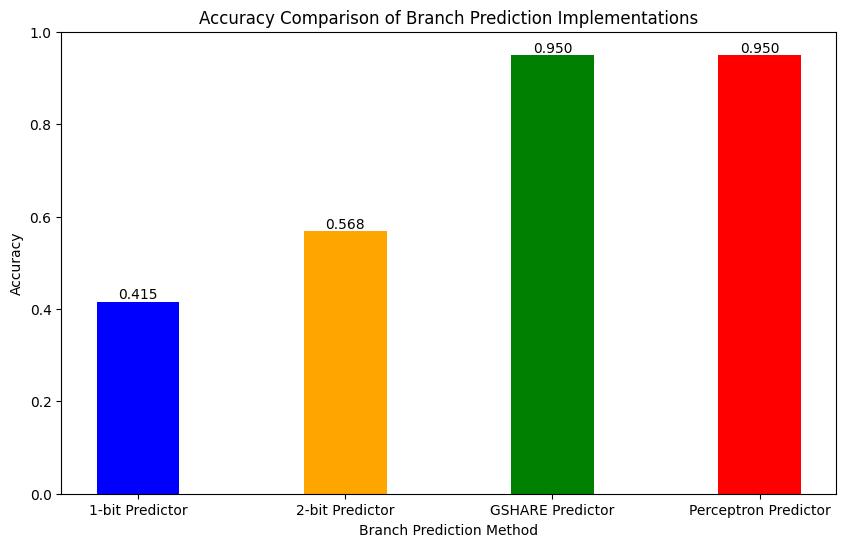

In [ ]:
# Compare accuracies of different branch prediction implementations
accuracies = {
    "1-bit Predictor": accuracy_1bit,
    "2-bit Predictor": accuracy_2bit,
    "GSHARE Predictor": accuracy_gshare,
    "Perceptron Predictor": accuracy_perceptron
}

# Plot the accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'orange', 'green', 'red'], width=0.4)

# Add accuracy values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom')

plt.title("Accuracy Comparison of Branch Prediction Implementations")
plt.ylabel("Accuracy")
plt.xlabel("Branch Prediction Method")
plt.ylim(0, 1)
plt.show()

In [1]:
"""
Definition of a BranchNet model in Pytorch
"""

import copy
import math
import numpy as np
import random
import torch
import torch.nn as nn


class BranchNetTrainingPhaseKnobs:
  """Set of knobs for reconfiguring a BranchNet model during training phases.
  """
  def __init__(self):
    self.quantize_convolution = False
    self.quantize_sumpooling = False
    self.quantize_hidden_fc = False
    self.quantize_final_fc = False

    self.prune_filters = False
    self.prune_fc_layers = False

    self.lut_convolution = False

    self.freeze_sumpooling_batchnorm_params = False
    self.freeze_hidden_fc_params = False


class Quantize(torch.autograd.Function):
  """Quantizes its input within [0,1] or [-1,+1]"""

  @staticmethod
  def forward(ctx, x, unsigned, precision):
    if unsigned:
      scale = ((1 << precision) - 1)
      return torch.round(x * scale) / scale
    else:
      if precision == 1:
        return -1 + 2 * (x > 0).float()
      else: 
        scale = ((1 << (precision - 1)) - 1)
        return torch.round(x * scale) / scale

  @staticmethod
  def backward(ctx, grad_output):
    return grad_output.clone(), None, None


def lists_have_equal_length(list_of_lists):
  """helper function to check that the length of lists are equals"""
  set_of_lengths = set(map(len, list_of_lists))
  return len(set_of_lengths) <= 1


# Extraction here happens from the configs folder where all the yaml files reside
def extract_slice_history(x, config, global_shift, slice_id):
  """Extract a portion of history for a slice."""

  total_history_size = x.shape[1]
  slice_size = config['history_lengths'][slice_id]
  pooling_width = config['pooling_widths'][slice_id]
  assert slice_size <= total_history_size

  if config['shifting_pooling'][slice_id]:
    slice_shift = global_shift % pooling_width
    inputs = []
    for i in range(x.shape[0]):
      slice_end = total_history_size - slice_shift[i]
      slice_start = slice_end - slice_size
      inputs.append(x[i, slice_start:slice_end])
    return torch.stack(inputs)
  else:
    return x[:, -slice_size:]


class Slice(nn.Module):
  """A Pytorch neural network module class to define a BranchNet slice
    corresponding to some portion of the history.
  """

  def __init__(self, config, slice_id, training_phase_knobs):
    """Creates all the layers and computes the expected output size.
    """
    super(Slice, self).__init__()
    history_length = config['history_lengths'][slice_id]
    conv_filters = config['conv_filters'][slice_id]
    conv_width = config['conv_widths'][slice_id]
    pooling_width = config['pooling_widths'][slice_id]
    embedding_dims = config['embedding_dims']
    use_Transformer_encoder = config['use_Transformer_encoder']
    pc_hash_bits = config['pc_hash_bits']
    hash_dir_with_pc = config['hash_dir_with_pc']

    # remember slice configuration
    self.config = config
    self.slice_id = slice_id
    self.lut_convolution = training_phase_knobs.lut_convolution
    self.quantize_sumpooling = training_phase_knobs.quantize_sumpooling
    self.training_phase_knobs = training_phase_knobs

    if training_phase_knobs.prune_filters:
      self.pruning_mask = nn.Parameter(torch.zeros(
          1, self.config['conv_filters'][slice_id], 1), requires_grad=False)

    # Declare all the neural network layers
    index_width = pc_hash_bits if hash_dir_with_pc else (pc_hash_bits + 1)
    if self.lut_convolution:
      if config['combined_hash_convolution']:
        assert not hash_dir_with_pc
        self.build_hashing_metadata()
        self.combined_lookup_table = nn.Embedding(
            2 ** config['combined_hash_convolution_width'],
            conv_filters)
        self.combined_lookup_table.weight.requires_grad = False
      else:
        self.lookup_tables = nn.ModuleList()
        for i in range(conv_width):
          self.lookup_tables.append(
              nn.Embedding(2 ** index_width, conv_filters))
          self.lookup_tables[i].weight.requires_grad = False 
    else:
      if config['combined_hash_convolution']:
        assert not hash_dir_with_pc
        self.build_hashing_metadata()
        self.combined_embedding_table = nn.Embedding(
            2 ** config['combined_hash_convolution_width'],
            embedding_dims)
        self.combined_conv = nn.Conv1d(embedding_dims, conv_filters, 1)
        self.batchnorm = nn.BatchNorm1d(conv_filters)
      else:
        self.embedding_table = nn.Embedding(2 ** index_width, embedding_dims)
        if(use_Transformer_encoder):
          self.Transformer_encoder = nn.TransformerEncoderLayer(d_model=embedding_dims, nhead=8, dim_feedforward=512, dropout=0.3)
        self.conv = nn.Conv1d(embedding_dims, conv_filters, conv_width)
        self.batchnorm = nn.BatchNorm1d(conv_filters)

    self.pooling = nn.AvgPool1d(pooling_width, padding=0)

    if self.quantize_sumpooling:
      self.pooling_batchnorm = nn.BatchNorm1d(
          conv_filters * self.config['sumpooling_copies'])
      if training_phase_knobs.freeze_sumpooling_batchnorm_params:
        self.pooling_batchnorm.bias.requires_grad = False
        self.pooling_batchnorm.weight.requires_grad = False
    else:
      self.pooling_batchnorm = nn.BatchNorm1d(conv_filters)


    # compute the slice output size
    if pooling_width == -1 or (config['shifting_pooling'][slice_id]
                               and config['sum_all_if_shifting_pool']):
      pooling_output_size = 1
    elif pooling_width > 0: 
      conv_output_size = (history_length - conv_width + 1)
      pooling_output_size = conv_output_size // pooling_width
    else:
      pooling_output_size = (history_length - conv_width + 1)
    self.total_output_size = pooling_output_size * conv_filters
    if self.quantize_sumpooling:
      self.total_output_size *= self.config['sumpooling_copies']
    if(self.config['use_lstm']):
      self.lstm = nn.LSTM(
        input_size=self.config['lstm_inp_dim'],
        hidden_size=self.config['lstm_hidden_size'],
        bidirectional = self.config['bidirectional'],
        batch_first=True
      )

  def build_hashing_metadata(self):
    num_input_bits = ((self.config['pc_hash_bits'] + 1) *
                      max(self.config['conv_widths']))
    num_output_bits = self.config['combined_hash_convolution_width']

    assert num_output_bits < 32
    self.hash_metadata = nn.Parameter(torch.randint(
        0, 2 ** num_output_bits, size=[num_input_bits], dtype=torch.int64), requires_grad=False)

  def hash_using_metadata(self, x, conv_width):
    batch_size = x.shape[0]
    available_history = x.shape[1]
    output_history = available_history + 1 - conv_width
    bits_per_conv_pos = self.config['pc_hash_bits'] + 1
    zero_tensor = torch.zeros(1,
                      dtype=torch.int64, device=x.device)
    out = torch.zeros(batch_size, output_history,
                      dtype=torch.int64, device=x.device)

    for conv_pos in range(conv_width):
      history_slice = x[:, available_history - conv_pos - output_history: available_history - conv_pos]
      for bit in range(bits_per_conv_pos):
        metadata_idx = conv_pos * bits_per_conv_pos + bit
        xor_pattern = self.hash_metadata[metadata_idx: metadata_idx + 1]
        out = out ^ torch.where((history_slice >> bit) & 1 == 1, xor_pattern, zero_tensor)
    
    return out


  def forward(self, x):
    history_length = self.config['history_lengths'][self.slice_id]
    conv_filters = self.config['conv_filters'][self.slice_id]
    conv_width = self.config['conv_widths'][self.slice_id]
    pooling_width = self.config['pooling_widths'][self.slice_id]

    if self.lut_convolution:
      if self.config['combined_hash_convolution']:
        x = self.hash_using_metadata(x, conv_width)
        x = self.combined_lookup_table(x)
        x = x.transpose(1, 2).contiguous()
        if self.training_phase_knobs.prune_filters:
          x = x * self.pruning_mask
      else:
        batch_size = x.shape[0]
        num_channels = conv_filters
        conv_outputs = torch.zeros(batch_size,
                                   num_channels,
                                   history_length - conv_width + 1,
                                   device=x.device)

        for conv_pos in range(conv_width):
          temp = self.lookup_tables[conv_pos](
              x[:,conv_pos:history_length-conv_width+conv_pos+1])
          temp = temp.transpose(1, 2)
          conv_outputs += temp
        x = conv_outputs
        x = self.convolution_activation(x)
    else:
      # convolution and batch norm layers
      if self.config['combined_hash_convolution']:
        x = self.hash_using_metadata(x, conv_width)
        x = self.combined_embedding_table(x)
        x = torch.transpose(x, 1, 2)
        x = self.combined_conv(x)
        x = self.batchnorm(x)
        x = self.convolution_activation(x)
      else:
        x = self.embedding_table(x)
        if (self.config['use_Transformer_encoder']):          
          x = self.Transformer_encoder(x)        
        x = torch.transpose(x, 1, 2)                
        x = self.conv(x)        
        x = self.batchnorm(x)
        x = self.convolution_activation(x)

    # pooling
    if pooling_width == -1 or (self.config['shifting_pooling'][self.slice_id]
                               and self.config['sum_all_if_shifting_pool']):
      x = torch.sum(x, 2, keepdim=True)
    elif pooling_width > 0:
      x = self.pooling(x) * pooling_width    
    x = self.sumpooling_activation(x)
    if(self.config['use_lstm']):
      x = x.permute(0, 2, 1)
      _ , (x , _ ) = self.lstm(x)
      x = x.permute(0, 2, 1)
      return x.reshape(-1, self.total_output_size)
    else:
      return x.view(-1, self.total_output_size)

  def get_output_size(self):
    """Returns the expected output size for the slice
    """
    return self.total_output_size

  def convolution_activation(self, x):
    """Returns post- and pre- quantization activations."""
    relu_act = nn.ReLU(inplace=True)
    sigmoid_act = nn.Sigmoid()
    tanh_act = nn.Tanh()
    quantize = Quantize.apply

    conv_activation_type = self.config['conv_activation']
    conv_quantization_bits = self.config['conv_quantization_bits']

    if conv_activation_type == 'relu':
      x = relu_act(x)
      if self.training_phase_knobs.prune_filters:
        x = x * self.pruning_mask
      assert not self.training_phase_knobs.quantize_convolution
      return x
    if conv_activation_type == 'sigmoid':
      x = sigmoid_act(x)
      if self.training_phase_knobs.prune_filters:
        x = x * self.pruning_mask
      if self.training_phase_knobs.quantize_convolution:
        assert conv_quantization_bits > 0
        return quantize(x, True, conv_quantization_bits)
      else:
        return x
    if conv_activation_type == 'tanh':
      x = tanh_act(x)
      if self.training_phase_knobs.prune_filters:
        x = x * self.pruning_mask
      if self.training_phase_knobs.quantize_convolution:
        assert conv_quantization_bits > 0
        return quantize(x, False, conv_quantization_bits)
      else:
        return x

    assert False

  def sumpooling_activation(self, x):
    if self.quantize_sumpooling:
      repeat_pattern = [1] * len(x.shape)
      repeat_pattern[1] = self.config['sumpooling_copies']
      x = x.repeat(*repeat_pattern)

    tanh_act = nn.Tanh()
    hardtanh_act = nn.Hardtanh()
    sigmoid_act = nn.Tanh()
    hardsigmoid_act = nn.Hardtanh(min_val=0.0, max_val=1.0)
    quantize = Quantize.apply

    activation = self.config['sumpooling_activation']
    quantization_bits = self.config['sumpooling_quantization_bits']

    if activation == 'none':
      assert quantization_bits == 0
      return x
    if activation == 'bn_only':
      assert quantization_bits == 0
      return self.pooling_batchnorm(x)
    if activation == 'tanh':
      x = tanh_act(self.pooling_batchnorm(x))
      if not self.quantize_sumpooling or quantization_bits == 0:
        return x
      else:
        return quantize(x, False, quantization_bits)
    if activation == 'hardtanh':
      x = hardtanh_act(self.pooling_batchnorm(x))
      if not self.quantize_sumpooling or quantization_bits == 0:
        return x
      else:
        return quantize(x, False, quantization_bits)
    if activation == 'sigmoid':
      x = sigmoid_act(self.pooling_batchnorm(x))
      if not self.quantize_sumpooling or quantization_bits == 0:
        return x
      else:
        return quantize(x, True, quantization_bits)
    if activation == 'hardsigmoid':
      x = hardsigmoid_act(self.pooling_batchnorm(x))
      if not self.quantize_sumpooling or quantization_bits == 0:
        return x
      else:
        return quantize(x, True, quantization_bits)

    assert False

  def setup_pruning_mask(self, useful_channels_for_slice):
    indices = torch.LongTensor(useful_channels_for_slice).to(
        self.pruning_mask.device).unsqueeze(0).unsqueeze(2)
    self.pruning_mask.scatter_(1, indices, 1)
    print(self.pruning_mask.view(-1))


class FCLayer(nn.Module):
  def __init__(self, input_dim, output_dim, *, activation, quantize,
               quantized_act_bits, quantized_weight_bits, freeze_params,
               use_pruning_mask):
    super(FCLayer, self).__init__()
    self.use_pruning_mask = use_pruning_mask
    self.activation = activation
    self.quantize = quantize
    self.quantized_act_bits = quantized_act_bits
    self.quantized_weight_bits = quantized_weight_bits

    self.weight = nn.Parameter(torch.empty(output_dim, input_dim),
                                     requires_grad=not freeze_params)
    self.bias = nn.Parameter(torch.empty(output_dim),
                                   requires_grad=not freeze_params)
    if activation is not None:
      self.batchnorm = nn.BatchNorm1d(output_dim)

    if use_pruning_mask:
      self.pruning_mask = nn.Parameter(torch.zeros_like(self.bias),
                                    requires_grad=False)

    self.randomize_weights()

  def forward(self, x):
    quantize = Quantize.apply

    if self.quantize and self.quantized_weight_bits > 0: 
      self.state_dict()['weight'][:] = torch.clamp(
          self.weight.data, -1, 1)
      weight = quantize(self.weight, False, self.quantized_weight_bits)
    else:
      weight = self.weight

    x = nn.functional.linear(x, weight, bias=self.bias)
    if self.activation is not None:
      x = self.activation_layer(x)
    if self.use_pruning_mask:
      x = x * self.pruning_mask
    return x

  def activation_layer(self, x):
    x = self.batchnorm(x)

    quantize = Quantize.apply
    relu_act = nn.ReLU(inplace=True)
    sigmoid_act = nn.Sigmoid()
    tanh_act = nn.Tanh()
    hardtanh_act = nn.Hardtanh()
    quantize_act = self.quantize and self.quantized_act_bits > 0

    if self.activation == 'relu':
      assert not quantize_act
      x = relu_act(x)
    elif self.activation == 'sigmoid':
      x = sigmoid_act(x)
      if quantize_act:
        x = quantize(x, True, self.quantized_act_bits)
    elif self.activation == 'tanh':
      x = tanh_act(x)
      if quantize_act:
        x = quantize(x, False, self.quantized_act_bits)
    elif self.activation == 'hardtanh':
      x = hardtanh_act(x)
      if quantize_act:
        x = quantize(x, False, self.quantized_act_bits)
    else:
      assert False

    return x

  def randomize_weights(self):
    output_dim = self.weight.shape[0]
    input_dim = self.weight.shape[1]
    glorot_init_bound = math.sqrt(2. / (input_dim + output_dim))
    if self.quantize and self.quantized_weight_bits > 0:
      self.weight.data.uniform_(-1, 1)
    else:
      self.weight.data.uniform_(-glorot_init_bound, +glorot_init_bound)
    self.bias.data.uniform_(-glorot_init_bound, +glorot_init_bound)

  def l1_loss(self):
    return torch.sum(torch.abs(self.weight))

  def setup_pruning_mask(self, top_neuron_indices):
    self.pruning_mask.scatter_(0, top_neuron_indices, 1)
    print(self.pruning_mask)


class BranchNetMLP(nn.Module):
  def __init__(self, config, training_phase_knobs, flattened_input_dim):
    super(BranchNetMLP, self).__init__()
    self.config = config
    self.training_phase_knobs = training_phase_knobs
    self.hidden_layers = nn.ModuleList()

    next_input_dim = flattened_input_dim
    for hidden_output_dim in self.config['hidden_neurons']:
      assert hidden_output_dim > 0
      self.hidden_layers.append(FCLayer(
          next_input_dim, hidden_output_dim,
          activation=self.config['hidden_fc_activation'],
          quantize=training_phase_knobs.quantize_hidden_fc,
          quantized_act_bits=self.config['hidden_fc_activation_quantization_bits'],
          quantized_weight_bits=self.config['hidden_fc_weight_quantization_bits'],
          freeze_params=training_phase_knobs.freeze_hidden_fc_params,
          use_pruning_mask=training_phase_knobs.prune_fc_layers))
      next_input_dim = hidden_output_dim

    self.last_layer = FCLayer(
        next_input_dim, 1,
        activation=None,
        quantize=training_phase_knobs.quantize_final_fc,
        quantized_act_bits=0,
        quantized_weight_bits=self.config['final_fc_weight_quantization_bits'],
        freeze_params=False,
        use_pruning_mask=False)

  def forward(self, x):    
    for i in range(len(self.hidden_layers)):
      x = self.hidden_layers[i](x)
    x = self.last_layer(x)
    return x.squeeze(dim=1)

  def randomize_weights(self):
    for i in range(len(self.config['hidden_neurons'])):
      self.hidden_layers[i].randomize_weights()
    self.last_layer.randomize_weights()

  def l1_loss(self):
    loss = self.last_layer.l1_loss()
    # Skip the first hidden fc for regularization.
    for i in range(1, len(self.config['hidden_neurons'])):
      loss += self.hidden_layers[i].l1_loss()
    return loss

  def setup_fc_pruning_masks(self):
    for i in range(0, len(self.config['hidden_neurons'])):
      if i == len(self.config['hidden_neurons']) - 1:
        next_layer = self.last_layer
      else:
        next_layer = self.hidden_layers[i + 1]
      sum_next_weights = torch.sum(torch.abs(next_layer.weight), dim=[0])
      top_neuron_indices = torch.topk(
          sum_next_weights,
          self.config['pruned_hidden_neurons'][i]).indices
      self.hidden_layers[i].setup_pruning_mask(top_neuron_indices)

class BranchNet(nn.Module):
  """
  A Pytorch neural network module class to define BranchNet architecture.
  """

  def __init__(self, config, training_phase_knobs):
    super(BranchNet, self).__init__()

    assert lists_have_equal_length(
        [config['history_lengths'], config['conv_filters'],
         config['conv_widths'], config['pooling_widths']])

    self.history_lengths = config['history_lengths']
    self.config = config
    self.linear_pruning_mask = None
    self.quantize_fc = False
    self.training_phase_knobs = training_phase_knobs

    num_slices = len(self.history_lengths)
    self.slices = nn.ModuleList()
    concatenated_slices_output_size = 0
    for slice_id in range(num_slices):
      if config['conv_filters'][slice_id] > 0:
        self.slices.append(Slice(config, slice_id,  training_phase_knobs))
        concatenated_slices_output_size += self.slices[slice_id].get_output_size()
      else:
        self.slices.append(nn.ReLU()) #insert dummy module instead of a slice    
    self.mlp = BranchNetMLP(self.config, self.training_phase_knobs,
                            concatenated_slices_output_size)

  def forward(self, x):
    #pylint: disable=arguments-differ
    #It is expected to change forward() arguments.
    #if self.linear_pruning_mask is not None:
    #  self.state_dict()['linear.weight'][:] = self.linear.weight * self.linear_pruning_mask
    if any(self.config['shifting_pooling']):
      global_shift = np.random.randint(max(self.config['pooling_widths']), size=(x.shape[0]))
    else:
      global_shift = None

    slice_outs = []
    num_slices = len(self.history_lengths)

    for slice_id in range(num_slices):
      if self.config['conv_filters'][slice_id] > 0:
        x_ = extract_slice_history(x, self.config, global_shift, slice_id)
        x_ = self.slices[slice_id](x_)
        slice_outs.append(x_)        
    x = torch.cat(slice_outs, dim=1)    
    x = self.mlp(x)
    return x

  def train(self, mode=True):
    super(BranchNet, self).train(mode)
    if self.training_phase_knobs.freeze_sumpooling_batchnorm_params:
      for slice_id in range(len(self.history_lengths)):
        self.slices[slice_id].pooling_batchnorm.eval()

  def reinitialize_fc_weights(self):
    self.mlp.randomize_weights()

  def prune_hidden_fc(self, n):
    self.linear_pruning_mask = self.linear.weight.clone().detach().zero_()
    selected_indices = torch.topk(abs(self.linear.weight), n, dim=1)
    self.linear_pruning_mask.scatter_(1, selected_indices[1], 1)
    

  def linear_regularization_loss(self):
    return torch.norm(self.linear.weight)

  def group_lasso_loss_values(self):
    """ Get the loss term for convolution filters group lassos
    """
    lasso_groups = []
    num_slices = len(self.history_lengths)

    for slice_id in range(num_slices):
      conv_weights_squared = self.slices[slice_id].conv.weight.pow(2)
      lasso_groups.append(torch.sqrt(conv_weights_squared.sum(dim=[1, 2])))

    return lasso_groups

  def group_lasso_loss(self):
    """ Get the loss term for convolution filters group lassos
    """
    lasso_groups = []
    #linear_weights_squared = self.linear.weight.pow(2)
    if len(self.mlp.hidden_layers) > 0:
      linear_weights_squared = self.mlp.hidden_layers[0].weight.pow(2)
    else:
      linear_weights_squared = self.mlp.last_layer.weight.pow(2)
    num_slices = len(self.history_lengths)

    i = 0
    for slice_id in range(num_slices):
      # Grouping Convolution Weights.
      conv_weights_squared = self.slices[slice_id].conv.weight.pow(2)
      lasso_groups.append(conv_weights_squared.sum(dim=[1, 2]))
      lasso_groups.append(self.slices[slice_id].embedding_table.weight.pow(2).sum(dim=[1]))

      # Grouping Fully-connected Weights.
      slice_output_size = self.slices[slice_id].get_output_size()
      num_filters = self.config['conv_filters'][slice_id]

      slice_linear_weights_squared = (
          linear_weights_squared[:, i:i+slice_output_size])
      i += slice_output_size

      slice_linear_weights_squared = slice_linear_weights_squared.view(
          -1, num_filters, slice_output_size // num_filters)
      lasso_groups.append(slice_linear_weights_squared.sum(dim=[0, 2]))

    return torch.sum(torch.sqrt(torch.cat(lasso_groups, dim=0)))

  def fc_weights_l1_loss(self):
    return self.mlp.l1_loss()

  def copy_from_other_model(self, other_model):
    for key in self.state_dict():
      if key in other_model.state_dict():
        if len(other_model.state_dict()[key].shape) > 0:
          if (self.state_dict()[key].shape
              == other_model.state_dict()[key].shape):
            self.state_dict()[key][:] = other_model.state_dict()[key]
          else:
            print('Warning: did not copy', key)
    self.copy_masks(other_model)

  def setup_fc_pruning_masks(self):
    self.mlp.setup_fc_pruning_masks()

  def quantize_luts(self, x, conv_activation_type, conv_quantization_bits):
    quantize = Quantize.apply
    if conv_activation_type == 'relu':
      act = nn.ReLU()
      assert conv_quantization_bits == 0
      x = act(x)
    elif conv_activation_type == 'sigmoid':
      act = nn.Sigmoid()
      x = act(x)
      if conv_quantization_bits > 0:
        x = quantize(x, True, conv_quantization_bits)
    elif conv_activation_type == 'tanh':
      act = nn.Tanh()
      x = act(x)
      if conv_quantization_bits > 0:
        x = quantize(x, False, conv_quantization_bits)
    return x

  def load_convolution_luts(self, trained_branchnet):
    assert self.training_phase_knobs.lut_convolution is True
    assert trained_branchnet.training_phase_knobs.lut_convolution is False

    conv_filters = self.config['conv_filters']
    conv_widths = self.config['conv_widths']
    conv_activation_type = self.config['conv_activation']
    conv_quantization_bits = self.config['conv_quantization_bits']
    self.copy_from_other_model(trained_branchnet)

    if self.config['combined_hash_convolution']:
      for slice_id in range(len(conv_filters)):
        orig_embedding = trained_branchnet.state_dict()[
            'slices.{}.combined_embedding_table.weight'.format(slice_id)]
        conv_weight = trained_branchnet.state_dict()[
            'slices.{}.combined_conv.weight'.format(slice_id)]
        conv_bias = trained_branchnet.state_dict()[
            'slices.{}.combined_conv.bias'.format(slice_id)]
        batchnorm_weight = trained_branchnet.state_dict()[
            'slices.{}.batchnorm.weight'.format(slice_id)]
        batchnorm_bias = trained_branchnet.state_dict()[
            'slices.{}.batchnorm.bias'.format(slice_id)]
        batchnorm_mean = trained_branchnet.state_dict()[
            'slices.{}.batchnorm.running_mean'.format(slice_id)]
        batchnorm_var = trained_branchnet.state_dict()[
            'slices.{}.batchnorm.running_var'.format(slice_id)]

        new_embedding = self.state_dict()[
            'slices.{}.combined_lookup_table.weight'.format(slice_id)]

        conv_weights_transposed = conv_weight[:, :, 0].transpose(0, 1)
        new_embedding[:] = torch.matmul(orig_embedding, conv_weights_transposed)
        new_embedding += conv_bias.view(1, conv_filters[slice_id])
        new_embedding -= batchnorm_mean.view(1, conv_filters[slice_id])
        new_embedding /= torch.sqrt(
            batchnorm_var.view(1, conv_filters[slice_id]) + 1e-5)
        new_embedding *= batchnorm_weight.view(1, conv_filters[slice_id])
        new_embedding += batchnorm_bias.view(1, conv_filters[slice_id])

        new_embedding[:] = self.quantize_luts(
            new_embedding, conv_activation_type, conv_quantization_bits)
        final_luts = new_embedding

        if conv_quantization_bits > 0:
          max_val = 1
          if conv_activation_type in ['sigmoid' or 'cross_channel_sigmoid_binarize']:
            min_val = 0
            num_slices = (2 ** conv_quantization_bits - 1)
          elif conv_activation_type == 'tanh':
            min_val = -1
            num_slices = max(1, 2 ** conv_quantization_bits - 2)
          else:
            assert False

          step = (max_val - min_val) / num_slices
          bin_boundaries = np.arange(min_val, max_val, step) + (step/2)
          bin_values = np.concatenate([np.arange(min_val, max_val, step), np.array([max_val])])
          digitized_filters = np.digitize(final_luts.cpu().numpy(), bin_boundaries)
          for bin_id in range(len(bin_boundaries) + 1):
            print('Number of {}: {}'.format(bin_values[bin_id], np.sum(digitized_filters == bin_id)))
        
    else:
      for slice_id in range(len(conv_filters)):
        orig_embedding = trained_branchnet.state_dict()[
            'slices.{}.embedding_table.weight'.format(slice_id)]
        conv_weight = trained_branchnet.state_dict()[
            'slices.{}.conv.weight'.format(slice_id)]
        conv_bias = trained_branchnet.state_dict()[
            'slices.{}.conv.bias'.format(slice_id)]
        batchnorm_weight = trained_branchnet.state_dict()[
            'slices.{}.batchnorm.weight'.format(slice_id)]
        batchnorm_bias = trained_branchnet.state_dict()[
            'slices.{}.batchnorm.bias'.format(slice_id)]
        batchnorm_mean = trained_branchnet.state_dict()[
            'slices.{}.batchnorm.running_mean'.format(slice_id)]
        batchnorm_var = trained_branchnet.state_dict()[
            'slices.{}.batchnorm.running_var'.format(slice_id)]
        
        list_new_embeddings = []
        for conv_pos in range(conv_widths[slice_id]):
          new_embedding = self.state_dict()[
              'slices.{}.lookup_tables.{}.weight'.format(slice_id, conv_pos)]
          conv_pos_weights = conv_weight[ :, :, conv_pos]
          conv_pos_weights = conv_pos_weights.transpose(0, 1)
          new_embedding[:] = torch.matmul(orig_embedding, conv_pos_weights)
          new_embedding[:] = new_embedding + (
              conv_bias.view(1, conv_filters[slice_id]) / conv_widths[slice_id])
          new_embedding[:] = new_embedding - (
              batchnorm_mean.view(1, conv_filters[slice_id]) / conv_widths[slice_id])
          new_embedding[:] = new_embedding * batchnorm_weight.view(1, conv_filters[slice_id])
          new_embedding[:] = new_embedding / torch.sqrt(
              batchnorm_var.view(1, conv_filters[slice_id]) + 1e-5)
          new_embedding += batchnorm_bias.view(
              1, conv_filters[slice_id]) / conv_widths[slice_id]
          list_new_embeddings.append(new_embedding)

  def setup_conv_pruning_masks(self, useful_channels):
    print('Useful Channels:', useful_channels)
    for slice_id, useful_channels_for_slice in enumerate(useful_channels):
      self.slices[slice_id].setup_pruning_mask(useful_channels_for_slice)
  
  def copy_masks(self, other):
    if (self.training_phase_knobs.prune_filters
        and other.training_phase_knobs.prune_filters):
      num_slices = len(self.config['conv_filters'])
      for slice_id in range(num_slices):
        self.slices[slice_id].pruning_mask = other.slices[slice_id].pruning_mask


In [2]:
import  torch
from torch.utils.data import Dataset

class BranchHistoryDataset(Dataset):
    def __init__(self, csv_path, history_lengths):
        df = pd.read_csv(csv_path)

        self.max_hist = max(history_lengths)
        self.histories = []
        self.targets   = torch.tensor(df["taken"].values, dtype=torch.float32)

        for hist_str in df["history"].fillna("").values:
            bits   = [int(b) for b in hist_str.split(",") if b != ""]
            tokens = bits[-self.max_hist:]                          # truncate
            tokens = [0]*(self.max_hist-len(tokens)) + tokens       # left-pad
            self.histories.append(torch.tensor(tokens, dtype=torch.long))

    def __len__(self):  return len(self.targets)
    def __getitem__(self, i):  return self.histories[i], self.targets[i]


In [3]:
import yaml

with open("/home/gkapakos/Desktop/ECE/10th_Semester/Architecture_of_Parallel_Systems/Project/BranchPredictionAI/KladosNet/branchnet/configs/mini_250.yaml") as fh:          # ← the file you uploaded
    cfg = yaml.safe_load(fh)          # cfg is now a Python dict


In [4]:
train_phase_knobs = BranchNetTrainingPhaseKnobs()

model = BranchNet(cfg, train_phase_knobs)

In [5]:
from torch.utils.data import random_split, DataLoader
import pandas as pd

dataloader = BranchHistoryDataset("/home/gkapakos/Desktop/ECE/10th_Semester/Architecture_of_Parallel_Systems/Project/BranchPredictionAI/dataset.csv", cfg['history_lengths'])

train_ratio = 0.8                       # 80 % train, 20 % val
train_len   = int(train_ratio * len(dataloader))
val_len     = len(dataloader) - train_len

train_ds, val_ds = random_split(
    dataloader,
    lengths=[train_len, val_len],
    generator=torch.Generator().manual_seed(42)   # fix the seed once
)

train_loader = DataLoader(train_ds, batch_size=256, shuffle=True,  num_workers=4)
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False, num_workers=4)

In [7]:
# train_branchnet_minimal.py  (excerpt)
import torch
from sklearn.metrics import accuracy_score          # pip install scikit-learn

BATCH_SIZE = 256
VAL_RATIO  = 0.2
EPOCHS     = 10
LR         = 3e-4

device = "cuda" if torch.cuda.is_available() else "cpu"

criterion  = torch.nn.BCEWithLogitsLoss()
optimizer  = torch.optim.Adam(model.parameters(), lr=LR)
scheduler  = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
scaler     = torch.cuda.amp.GradScaler(enabled=(device == "cuda"))

print(f"🌟 Model parameters: {sum(p.numel() for p in model.parameters())/1e6:.2f} M")

best_val_loss = float("inf")
for epoch in range(1, EPOCHS + 1):

    # ──────────────── TRAIN ────────────────────────────────
    model.train()
    train_loss_sum, train_samples = 0.0, 0
    train_preds,  train_labels    = [], []

    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad(set_to_none=True)

        with torch.cuda.amp.autocast(enabled=scaler.is_enabled()):
            logits = model(X)
            loss   = criterion(logits, y)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # bookkeeping
        train_loss_sum += loss.item() * X.size(0)
        train_samples  += X.size(0)

        train_preds.append((logits > 0).cpu())   # logits>0 == prob>0.5
        train_labels.append(y.cpu())

    scheduler.step()
    train_loss = train_loss_sum / train_samples
    train_acc  = accuracy_score(torch.cat(train_labels),
                                torch.cat(train_preds))

    # ──────────────── VALIDATE ─────────────────────────────
    model.eval()
    val_loss_sum, val_samples = 0.0, 0
    val_preds,  val_labels    = [], []

    with torch.no_grad(), torch.cuda.amp.autocast(enabled=scaler.is_enabled()):
        for X, y in val_loader:
            X, y = X.to(device), y.to(device)
            logits   = model(X)
            val_loss = criterion(logits, y)

            val_loss_sum += val_loss.item() * X.size(0)
            val_samples  += X.size(0)

            val_preds.append((logits > 0).cpu())
            val_labels.append(y.cpu())

    val_loss = val_loss_sum / val_samples
    val_acc  = accuracy_score(torch.cat(val_labels),
                              torch.cat(val_preds))

    # ──────────────── LOG / CKPT ───────────────────────────
    print(f"epoch {epoch:02d} │ "
          f"train loss {train_loss:.4f}  acc {train_acc*100:5.2f}% │ "
          f"val loss {val_loss:.4f}  acc {val_acc*100:5.2f}%")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "branchnet_best.pt")
        print("   ↳ 🏅 new best model saved")

print(f"✅ finished – best val loss {best_val_loss:.4f}")

🌟 Model parameters: 0.01 M


/tmp/ipykernel_65884/4090792369.py:15: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler     = torch.cuda.amp.GradScaler(enabled=(device == "cuda"))
/tmp/ipykernel_65884/4090792369.py:31: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler.is_enabled()):
/tmp/ipykernel_65884/4090792369.py:56: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast(enabled=scaler.is_enabled()):


epoch 01 │ train loss 0.0005  acc 100.00% │ val loss 0.0001  acc 100.00%
   ↳ 🏅 new best model saved


/tmp/ipykernel_65884/4090792369.py:31: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler.is_enabled()):


KeyboardInterrupt: 

In [1]:
# # Κλαδος Net
# """
# Definition of a BranchNet model in Pytorch
# """

# import math
# import numpy as np
# import torch
# import torch.nn as nn

# def lists_have_equal_length(list_of_lists):
#   """helper function to check that the length of lists are equals"""
#   set_of_lengths = set(map(len, list_of_lists))
#   return len(set_of_lengths) <= 1


# # Extraction here happens from the configs folder where all the yaml files reside
# def extract_slice_history(x, config, global_shift, slice_id):
#   """Extract a portion of history for a slice."""

#   total_history_size = x.shape[1]
#   slice_size = config['history_lengths'][slice_id]
#   pooling_width = config['pooling_widths'][slice_id]
#   assert slice_size <= total_history_size

#   if config['shifting_pooling'][slice_id]:
#     slice_shift = global_shift % pooling_width
#     inputs = []
#     for i in range(x.shape[0]):
#       slice_end = total_history_size - slice_shift[i]
#       slice_start = slice_end - slice_size
#       inputs.append(x[i, slice_start:slice_end])
#     return torch.stack(inputs)
#   else:
#     return x[:, -slice_size:]


# class Slice(nn.Module):
#   """A Pytorch neural network module class to define a BranchNet slice
#     corresponding to some portion of the history.
#   """

#   def __init__(self, config, slice_id):
#     """Creates all the layers and computes the expected output size.
#     """
#     super(Slice, self).__init__()
#     history_length = config['history_lengths'][slice_id]
#     conv_filters = config['conv_filters'][slice_id]
#     conv_width = config['conv_widths'][slice_id]
#     pooling_width = config['pooling_widths'][slice_id]
#     embedding_dims = config['embedding_dims']
#     use_Transformer_encoder = config['use_Transformer_encoder']
#     pc_hash_bits = config['pc_hash_bits']
#     hash_dir_with_pc = config['hash_dir_with_pc']

#     # remember slice configuration
#     self.config = config
#     self.slice_id = slice_id

#     # Declare all the neural network layers
#     index_width = pc_hash_bits if hash_dir_with_pc else (pc_hash_bits + 1)
#     if config['combined_hash_convolution']:
#       assert not hash_dir_with_pc
#       self.build_hashing_metadata()
#       self.combined_embedding_table = nn.Embedding(
#           2 ** config['combined_hash_convolution_width'],
#           embedding_dims)
#       self.combined_conv = nn.Conv1d(embedding_dims, conv_filters, 1)
#       self.batchnorm = nn.BatchNorm1d(conv_filters)
#     else:
#       self.embedding_table = nn.Embedding(2 ** index_width, embedding_dims)
#       if(use_Transformer_encoder):
#         self.Transformer_encoder = nn.TransformerEncoderLayer(d_model=embedding_dims, nhead=8, dim_feedforward=512, dropout=0.3)
#       self.conv = nn.Conv1d(embedding_dims, conv_filters, conv_width)
#       self.batchnorm = nn.BatchNorm1d(conv_filters)

#     self.pooling = nn.AvgPool1d(pooling_width, padding=0)
#     self.pooling_batchnorm = nn.BatchNorm1d(conv_filters)


#     # compute the slice output size
#     if pooling_width == -1 or (config['shifting_pooling'][slice_id]
#                                and config['sum_all_if_shifting_pool']):
#       pooling_output_size = 1
#     elif pooling_width > 0: 
#       conv_output_size = (history_length - conv_width + 1)
#       pooling_output_size = conv_output_size // pooling_width
#     else:
#       pooling_output_size = (history_length - conv_width + 1)
#     self.total_output_size = pooling_output_size * conv_filters
#     if(self.config['use_lstm']):
#       self.lstm = nn.LSTM(
#         input_size=self.config['lstm_inp_dim'],
#         hidden_size=self.config['lstm_hidden_size'],
#         bidirectional = self.config['bidirectional'],
#         batch_first=True
#       )

#   def build_hashing_metadata(self):
#     num_input_bits = ((self.config['pc_hash_bits'] + 1) *
#                       max(self.config['conv_widths']))
#     num_output_bits = self.config['combined_hash_convolution_width']

#     assert num_output_bits < 32
#     self.hash_metadata = nn.Parameter(torch.randint(
#         0, 2 ** num_output_bits, size=[num_input_bits], dtype=torch.int64), requires_grad=False)

#   def hash_using_metadata(self, x, conv_width):
#     batch_size = x.shape[0]
#     available_history = x.shape[1]
#     output_history = available_history + 1 - conv_width
#     bits_per_conv_pos = self.config['pc_hash_bits'] + 1
#     zero_tensor = torch.zeros(1,
#                       dtype=torch.int64, device=x.device)
#     out = torch.zeros(batch_size, output_history,
#                       dtype=torch.int64, device=x.device)

#     for conv_pos in range(conv_width):
#       history_slice = x[:, available_history - conv_pos - output_history: available_history - conv_pos]
#       for bit in range(bits_per_conv_pos):
#         metadata_idx = conv_pos * bits_per_conv_pos + bit
#         xor_pattern = self.hash_metadata[metadata_idx: metadata_idx + 1]
#         out = out ^ torch.where((history_slice >> bit) & 1 == 1, xor_pattern, zero_tensor)
    
#     return out


#   def forward(self, x):
#     history_length = self.config['history_lengths'][self.slice_id]
#     conv_filters = self.config['conv_filters'][self.slice_id]
#     conv_width = self.config['conv_widths'][self.slice_id]
#     pooling_width = self.config['pooling_widths'][self.slice_id]

#     # convolution and batch norm layers
#     if self.config['combined_hash_convolution']:
#       x = self.hash_using_metadata(x, conv_width)
#       x = self.combined_embedding_table(x)
#       x = torch.transpose(x, 1, 2)
#       x = self.combined_conv(x)
#       x = self.batchnorm(x)
#       x = self.convolution_activation(x)
#     else:
#       x = self.embedding_table(x)
#       if (self.config['use_Transformer_encoder']):          
#         x = self.Transformer_encoder(x)        
#       x = torch.transpose(x, 1, 2)                
#       x = self.conv(x)        
#       x = self.batchnorm(x)
#       x = self.convolution_activation(x)

#     # pooling
#     if pooling_width == -1 or (self.config['shifting_pooling'][self.slice_id]
#                                and self.config['sum_all_if_shifting_pool']):
#       x = torch.sum(x, 2, keepdim=True)
#     elif pooling_width > 0:
#       x = self.pooling(x) * pooling_width    
#     x = self.sumpooling_activation(x)
#     if(self.config['use_lstm']):
#       x = x.permute(0, 2, 1)
#       _ , (x , _ ) = self.lstm(x)
#       x = x.permute(0, 2, 1)
#       return x.reshape(-1, self.total_output_size)
#     else:
#       return x.view(-1, self.total_output_size)

#   def get_output_size(self):
#     """Returns the expected output size for the slice
#     """
#     return self.total_output_size

#   def convolution_activation(self, x):
#     """Returns post- and pre- quantization activations."""
#     relu_act = nn.ReLU(inplace=True)
#     sigmoid_act = nn.Sigmoid()
#     tanh_act = nn.Tanh()

#     conv_activation_type = self.config['conv_activation']

#     if conv_activation_type == 'relu':
#       x = relu_act(x)
#       return x
#     if conv_activation_type == 'sigmoid':
#       x = sigmoid_act(x)
#       return x
#     if conv_activation_type == 'tanh':
#       x = tanh_act(x)
#       return x
    
#     assert False

#   def sumpooling_activation(self, x):

#     tanh_act = nn.Tanh()
#     hardtanh_act = nn.Hardtanh()
#     sigmoid_act = nn.Tanh()
#     hardsigmoid_act = nn.Hardtanh(min_val=0.0, max_val=1.0)

#     activation = self.config['sumpooling_activation']

#     if activation == 'none':
#       return x
#     if activation == 'bn_only':
#       return self.pooling_batchnorm(x)
#     if activation == 'tanh':
#       x = tanh_act(self.pooling_batchnorm(x))
#       return x
#     if activation == 'hardtanh':
#       x = hardtanh_act(self.pooling_batchnorm(x))
#       return x
#     if activation == 'sigmoid':
#       x = sigmoid_act(self.pooling_batchnorm(x))
#       return x
#     if activation == 'hardsigmoid':
#       x = hardsigmoid_act(self.pooling_batchnorm(x))
#       return x

#     assert False


# class FCLayer(nn.Module):
#   def __init__(self, input_dim, output_dim, activation):
#     super(FCLayer, self).__init__()
#     self.activation = activation

#     self.weight = nn.Parameter(torch.empty(output_dim, input_dim))
#     self.bias = nn.Parameter(torch.empty(output_dim))
#     if activation is not None:
#       self.batchnorm = nn.BatchNorm1d(output_dim)


#     self.randomize_weights()

#   def forward(self, x):
   
#     weight = self.weight

#     x = nn.functional.linear(x, weight, bias=self.bias)
#     if self.activation is not None:
#       x = self.activation_layer(x)
#     return x

#   def activation_layer(self, x):
#     x = self.batchnorm(x)

#     relu_act = nn.ReLU(inplace=True)
#     sigmoid_act = nn.Sigmoid()
#     tanh_act = nn.Tanh()
#     hardtanh_act = nn.Hardtanh()

#     if self.activation == 'relu':
#       x = relu_act(x)
#     elif self.activation == 'sigmoid':
#       x = sigmoid_act(x)
#     elif self.activation == 'tanh':
#       x = tanh_act(x)
#     elif self.activation == 'hardtanh':
#       x = hardtanh_act(x)
#     else:
#       assert False

#     return x

#   def randomize_weights(self):
#     output_dim = self.weight.shape[0]
#     input_dim = self.weight.shape[1]
#     glorot_init_bound = math.sqrt(2. / (input_dim + output_dim))
#     self.weight.data.uniform_(-glorot_init_bound, +glorot_init_bound)
#     self.bias.data.uniform_(-glorot_init_bound, +glorot_init_bound)

#   def l1_loss(self):
#     return torch.sum(torch.abs(self.weight))



# class BranchNetMLP(nn.Module):
#   def __init__(self, config, flattened_input_dim):
#     super(BranchNetMLP, self).__init__()
#     self.config = config
#     self.hidden_layers = nn.ModuleList()

#     next_input_dim = flattened_input_dim
#     for hidden_output_dim in self.config['hidden_neurons']:
#       assert hidden_output_dim > 0
#       self.hidden_layers.append(FCLayer(
#           next_input_dim, hidden_output_dim,
#           activation=self.config['hidden_fc_activation']))
#       next_input_dim = hidden_output_dim

#     self.last_layer = FCLayer(
#         next_input_dim, 1,
#         activation=None)

#   def forward(self, x):    
#     for i in range(len(self.hidden_layers)):
#       x = self.hidden_layers[i](x)
#     x = self.last_layer(x)
#     return x.squeeze(dim=1)

#   def randomize_weights(self):
#     for i in range(len(self.config['hidden_neurons'])):
#       self.hidden_layers[i].randomize_weights()
#     self.last_layer.randomize_weights()

#   def l1_loss(self):
#     loss = self.last_layer.l1_loss()
#     # Skip the first hidden fc for regularization.
#     for i in range(1, len(self.config['hidden_neurons'])):
#       loss += self.hidden_layers[i].l1_loss()
#     return loss

# class BranchNet(nn.Module):
#   """
#   A Pytorch neural network module class to define BranchNet architecture.
#   """

#   def __init__(self, config):
#     super(BranchNet, self).__init__()

#     assert lists_have_equal_length(
#         [config['history_lengths'], config['conv_filters'],
#          config['conv_widths'], config['pooling_widths']])

#     self.history_lengths = config['history_lengths']
#     self.config = config

#     num_slices = len(self.history_lengths)
#     self.slices = nn.ModuleList()
#     concatenated_slices_output_size = 0
#     for slice_id in range(num_slices):
#       if config['conv_filters'][slice_id] > 0:
#         self.slices.append(Slice(config, slice_id))
#         concatenated_slices_output_size += self.slices[slice_id].get_output_size()
#       else:
#         self.slices.append(nn.ReLU()) #insert dummy module instead of a slice    
#     self.mlp = BranchNetMLP(self.config,
#                             concatenated_slices_output_size)

#   def forward(self, x):
#     #pylint: disable=arguments-differ
#     #It is expected to change forward() arguments.
#     if any(self.config['shifting_pooling']):
#       global_shift = np.random.randint(max(self.config['pooling_widths']), size=(x.shape[0]))
#     else:
#       global_shift = None

#     slice_outs = []
#     num_slices = len(self.history_lengths)

#     for slice_id in range(num_slices):
#       if self.config['conv_filters'][slice_id] > 0:
#         x_ = extract_slice_history(x, self.config, global_shift, slice_id)
#         x_ = self.slices[slice_id](x_)
#         slice_outs.append(x_)        
#     x = torch.cat(slice_outs, dim=1)    
#     x = self.mlp(x)
#     return x

#   def train(self, mode=True):
#     super(BranchNet, self).train(mode)

#   def reinitialize_fc_weights(self):
#     self.mlp.randomize_weights()

#   def linear_regularization_loss(self):
#     return torch.norm(self.linear.weight)

#   def group_lasso_loss_values(self):
#     """ Get the loss term for convolution filters group lassos
#     """
#     lasso_groups = []
#     num_slices = len(self.history_lengths)

#     for slice_id in range(num_slices):
#       conv_weights_squared = self.slices[slice_id].conv.weight.pow(2)
#       lasso_groups.append(torch.sqrt(conv_weights_squared.sum(dim=[1, 2])))

#     return lasso_groups

#   def group_lasso_loss(self):
#     """ Get the loss term for convolution filters group lassos
#     """
#     lasso_groups = []
#     if len(self.mlp.hidden_layers) > 0:
#       linear_weights_squared = self.mlp.hidden_layers[0].weight.pow(2)
#     else:
#       linear_weights_squared = self.mlp.last_layer.weight.pow(2)
#     num_slices = len(self.history_lengths)

#     i = 0
#     for slice_id in range(num_slices):
#       # Grouping Convolution Weights.
#       conv_weights_squared = self.slices[slice_id].conv.weight.pow(2)
#       lasso_groups.append(conv_weights_squared.sum(dim=[1, 2]))
#       lasso_groups.append(self.slices[slice_id].embedding_table.weight.pow(2).sum(dim=[1]))

#       # Grouping Fully-connected Weights.
#       slice_output_size = self.slices[slice_id].get_output_size()
#       num_filters = self.config['conv_filters'][slice_id]

#       slice_linear_weights_squared = (
#           linear_weights_squared[:, i:i+slice_output_size])
#       i += slice_output_size

#       slice_linear_weights_squared = slice_linear_weights_squared.view(
#           -1, num_filters, slice_output_size // num_filters)
#       lasso_groups.append(slice_linear_weights_squared.sum(dim=[0, 2]))

#     return torch.sum(torch.sqrt(torch.cat(lasso_groups, dim=0)))

#   def fc_weights_l1_loss(self):
#     return self.mlp.l1_loss()

In [3]:
# Κλαδος Net
"""
Definition of a BranchNet model in Pytorch
"""

import math
import numpy as np
import torch
import torch.nn as nn

################## BranchNet Architecture #####################

# Size of global history used in each chunk
history_lengths = [44, 92, 182]

# Number of convolution filters in each chunk
conv_filters = [2, 2, 2]

# The width of the convolution filter of each chunk
conv_widths = [3, 3, 3]

# The width of the pooling layer of each chunk
pooling_widths = [7, 15, 30]

# Set to True to simulate the effect of smaller inference engine buffers by
# randomly shifting the pooling windows
shifting_pooling = [False, False, False]


def lists_have_equal_length(list_of_lists):
  """helper function to check that the length of lists are equals"""
  set_of_lengths = set(map(len, list_of_lists))
  return len(set_of_lengths) <= 1


# Extraction here happens from the configs folder where all the yaml files reside
def extract_slice_history(x, global_shift, slice_id):
  """Extract a portion of history for a slice."""

  total_history_size = x.shape[1]
  slice_size = history_lengths[slice_id]
  pooling_width = pooling_widths[slice_id]
  assert slice_size <= total_history_size

  if shifting_pooling[slice_id]:
    slice_shift = global_shift % pooling_width
    inputs = []
    for i in range(x.shape[0]):
      slice_end = total_history_size - slice_shift[i]
      slice_start = slice_end - slice_size
      inputs.append(x[i, slice_start:slice_end])
    return torch.stack(inputs)
  else:
    return x[:, -slice_size:]


class Slice(nn.Module):
  """A Pytorch neural network module class to define a BranchNet slice
    corresponding to some portion of the history.
  """

  def __init__(self, slice_id):
    """Creates all the layers and computes the expected output size.
    """
    super(Slice, self).__init__()
    history_length = history_lengths[slice_id]
    conv_filter = conv_filters[slice_id]
    conv_width = conv_widths[slice_id]
    pooling_width = pooling_widths[slice_id]
    embedding_dims = 32

    # remember slice configuration
    self.slice_id = slice_id

    # Declare all the neural network layers
    self.build_hashing_metadata()
    self.combined_embedding_table = nn.Embedding(2 ** 7, embedding_dims)
    self.combined_conv = nn.Conv1d(embedding_dims, conv_filter, 1)
    self.batchnorm = nn.BatchNorm1d(conv_filter)

    self.pooling = nn.AvgPool1d(pooling_width, padding=0)
    self.pooling_batchnorm = nn.BatchNorm1d(conv_filter)


    # compute the slice output size
    if pooling_width == -1:
      pooling_output_size = 1
    elif pooling_width > 0: 
      conv_output_size = (history_length - conv_width + 1)
      pooling_output_size = conv_output_size // pooling_width
    else:
      pooling_output_size = (history_length - conv_width + 1)
    self.total_output_size = pooling_output_size * conv_filter
    # if(self.config['use_lstm']):
    #   self.lstm = nn.LSTM(
    #     input_size=self.config['lstm_inp_dim'],
    #     hidden_size=self.config['lstm_hidden_size'],
    #     bidirectional = self.config['bidirectional'],
    #     batch_first=True
    #   )

  def build_hashing_metadata(self):
    num_input_bits = ((7) *
                      max(conv_widths))
    num_output_bits = 7

    assert num_output_bits < 32
    self.hash_metadata = nn.Parameter(torch.randint(
        0, 2 ** num_output_bits, size=[num_input_bits], dtype=torch.int64), requires_grad=False)

  def hash_using_metadata(self, x, conv_width):
    batch_size = x.shape[0]
    available_history = x.shape[1]
    output_history = available_history + 1 - conv_width
    bits_per_conv_pos = 6 + 1
    zero_tensor = torch.zeros(1,
                      dtype=torch.int64, device=x.device)
    out = torch.zeros(batch_size, output_history,
                      dtype=torch.int64, device=x.device)

    for conv_pos in range(conv_width):
      history_slice = x[:, available_history - conv_pos - output_history: available_history - conv_pos]
      for bit in range(bits_per_conv_pos):
        metadata_idx = conv_pos * bits_per_conv_pos + bit
        xor_pattern = self.hash_metadata[metadata_idx: metadata_idx + 1]
        out = out ^ torch.where((history_slice >> bit) & 1 == 1, xor_pattern, zero_tensor)
    
    return out


  def forward(self, x):
    history_length = history_lengths[self.slice_id]
    conv_filter = conv_filters[self.slice_id]
    conv_width = conv_widths[self.slice_id]
    pooling_width = pooling_widths[self.slice_id]

    # convolution and batch norm layers
    x = self.hash_using_metadata(x, conv_width)
    x = self.combined_embedding_table(x)
    x = torch.transpose(x, 1, 2)
    x = self.combined_conv(x)
    x = self.batchnorm(x)
    x = self.convolution_activation(x)

    # pooling
    if pooling_width == -1:
      x = torch.sum(x, 2, keepdim=True)
    elif pooling_width > 0:
      x = self.pooling(x) * pooling_width    
    x = self.sumpooling_activation(x)
    # if(self.config['use_lstm']):
    #   x = x.permute(0, 2, 1)
    #   _ , (x , _ ) = self.lstm(x)
    #   x = x.permute(0, 2, 1)
    #   return x.reshape(-1, self.total_output_size)
    # else:
    return x.view(-1, self.total_output_size)

  def get_output_size(self):
    """Returns the expected output size for the slice
    """
    return self.total_output_size

  def convolution_activation(self, x):
    """Returns post- and pre- quantization activations."""
    sigmoid_act = nn.Sigmoid()
    x = sigmoid_act(x)

    return x
    

  def sumpooling_activation(self, x):

    hardsigmoid_act = nn.Hardtanh(min_val=0.0, max_val=1.0)

    x = hardsigmoid_act(self.pooling_batchnorm(x))
    return x


class FCLayer(nn.Module):
  def __init__(self, input_dim, output_dim, activation):
    super(FCLayer, self).__init__()
    self.activation = activation

    self.weight = nn.Parameter(torch.empty(output_dim, input_dim))
    self.bias = nn.Parameter(torch.empty(output_dim))
    if activation is not None:
      self.batchnorm = nn.BatchNorm1d(output_dim)


    self.randomize_weights()

  def forward(self, x):
   
    weight = self.weight

    x = nn.functional.linear(x, weight, bias=self.bias)
    if self.activation is not None:
      x = self.activation_layer(x)
    return x

  def activation_layer(self, x):
    x = self.batchnorm(x)

    relu_act = nn.ReLU(inplace=True)
    sigmoid_act = nn.Sigmoid()
    tanh_act = nn.Tanh()
    hardtanh_act = nn.Hardtanh()

    if self.activation == 'relu':
      x = relu_act(x)
    elif self.activation == 'sigmoid':
      x = sigmoid_act(x)
    elif self.activation == 'tanh':
      x = tanh_act(x)
    elif self.activation == 'hardtanh':
      x = hardtanh_act(x)
    else:
      assert False

    return x

  def randomize_weights(self):
    output_dim = self.weight.shape[0]
    input_dim = self.weight.shape[1]
    glorot_init_bound = math.sqrt(2. / (input_dim + output_dim))
    self.weight.data.uniform_(-glorot_init_bound, +glorot_init_bound)
    self.bias.data.uniform_(-glorot_init_bound, +glorot_init_bound)

  def l1_loss(self):
    return torch.sum(torch.abs(self.weight))



class BranchNetMLP(nn.Module):
  def __init__(self, flattened_input_dim):
    super(BranchNetMLP, self).__init__()
    self.hidden_layers = nn.ModuleList()

    next_input_dim = flattened_input_dim
    for hidden_output_dim in [8]:
      assert hidden_output_dim > 0
      self.hidden_layers.append(FCLayer(
          next_input_dim, hidden_output_dim,
          activation='tanh'))
      next_input_dim = hidden_output_dim

    self.last_layer = FCLayer(
        next_input_dim, 1,
        activation=None)

  def forward(self, x):    
    for i in range(len(self.hidden_layers)):
      x = self.hidden_layers[i](x)
    x = self.last_layer(x)
    return x.squeeze(dim=1)

  def randomize_weights(self):
    for i in range(len([8])):
      self.hidden_layers[i].randomize_weights()
    self.last_layer.randomize_weights()

class BranchNet(nn.Module):
  """
  A Pytorch neural network module class to define BranchNet architecture.
  """

  def __init__(self):
    super(BranchNet, self).__init__()

    assert lists_have_equal_length(
        [history_lengths, conv_filters,
         conv_widths, pooling_widths])

    self.history_lengths = history_lengths

    num_slices = len(self.history_lengths)
    self.slices = nn.ModuleList()
    concatenated_slices_output_size = 0
    for slice_id in range(num_slices):
      if conv_filters[slice_id] > 0:
        self.slices.append(Slice(slice_id))
        concatenated_slices_output_size += self.slices[slice_id].get_output_size()
      else:
        self.slices.append(nn.ReLU()) #insert dummy module instead of a slice    
    self.mlp = BranchNetMLP(concatenated_slices_output_size)

  def forward(self, x):
    #pylint: disable=arguments-differ
    #It is expected to change forward() arguments.
    if any(shifting_pooling):
      global_shift = np.random.randint(max(pooling_widths), size=(x.shape[0]))
    else:
      global_shift = None

    slice_outs = []
    num_slices = len(self.history_lengths)

    for slice_id in range(num_slices):
      if conv_filters[slice_id] > 0:
        x_ = extract_slice_history(x, global_shift, slice_id)
        x_ = self.slices[slice_id](x_)
        slice_outs.append(x_)        
    x = torch.cat(slice_outs, dim=1)    
    x = self.mlp(x)
    return x

  def train(self, mode=True):
    super(BranchNet, self).train(mode)


In [ ]:
import  torch
from torch.utils.data import Dataset

class BranchHistoryDataset(Dataset):
    def __init__(self, csv_path, history_lengths):
        df = pd.read_csv(csv_path)

        self.max_hist = max(history_lengths)
        self.histories = []
        self.targets   = torch.tensor(df["taken"].values, dtype=torch.float32)

        for hist_str in df["history"].fillna("").values:
            bits   = [int(b) for b in hist_str.split(",") if b != ""]
            tokens = bits[-self.max_hist:]                          # truncate
            tokens = [0]*(self.max_hist-len(tokens)) + tokens       # left-pad
            self.histories.append(torch.tensor(tokens, dtype=torch.long))

    def __len__(self):  return len(self.targets)
    def __getitem__(self, i):  return self.histories[i], self.targets[i]

import yaml

with open("/home/gkapakos/Desktop/ECE/10th_Semester/Architecture_of_Parallel_Systems/Project/BranchPredictionAI/KladosNet/branchnet/configs/mini_250.yaml") as fh:          # ← the file you uploaded
    cfg = yaml.safe_load(fh)          # cfg is now a Python dict

from torch.utils.data import random_split, DataLoader
import pandas as pd

dataloader = BranchHistoryDataset("/home/gkapakos/Desktop/ECE/10th_Semester/Architecture_of_Parallel_Systems/Project/BranchPredictionAI/dataset.csv", cfg['history_lengths'])

train_ratio = 0.8                       # 80 % train, 20 % val
train_len   = int(train_ratio * len(dataloader))
val_len     = len(dataloader) - train_len

train_ds, val_ds = random_split(
    dataloader,
    lengths=[train_len, val_len],
    generator=torch.Generator().manual_seed(42)   # fix the seed once
)

train_loader = DataLoader(train_ds, batch_size=256, shuffle=True,  num_workers=4)
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False, num_workers=4)

# train_branchnet_minimal.py  (excerpt)
import torch
from sklearn.metrics import accuracy_score          # pip install scikit-learn

BATCH_SIZE = 256
VAL_RATIO  = 0.2
EPOCHS     = 10
LR         = 3e-4

device = "cuda" if torch.cuda.is_available() else "cpu"
model = BranchNet().to(device)
criterion  = torch.nn.BCEWithLogitsLoss()
optimizer  = torch.optim.Adam(model.parameters(), lr=LR)
scheduler  = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
scaler     = torch.cuda.amp.GradScaler(enabled=(device == "cuda"))

print(f"🌟 Model parameters: {sum(p.numel() for p in model.parameters())/1e6:.2f} M")

best_val_loss = float("inf")
for epoch in range(1, EPOCHS + 1):

    # ──────────────── TRAIN ────────────────────────────────
    model.train()
    train_loss_sum, train_samples = 0.0, 0
    train_preds,  train_labels    = [], []

    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad(set_to_none=True)

        with torch.cuda.amp.autocast(enabled=scaler.is_enabled()):
            logits = model(X)
            loss   = criterion(logits, y)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # bookkeeping
        train_loss_sum += loss.item() * X.size(0)
        train_samples  += X.size(0)

        train_preds.append((logits > 0).cpu())   # logits>0 == prob>0.5
        train_labels.append(y.cpu())

    scheduler.step()
    train_loss = train_loss_sum / train_samples
    train_acc  = accuracy_score(torch.cat(train_labels),
                                torch.cat(train_preds))

    # ──────────────── VALIDATE ─────────────────────────────
    model.eval()
    val_loss_sum, val_samples = 0.0, 0
    val_preds,  val_labels    = [], []

    with torch.no_grad(), torch.cuda.amp.autocast(enabled=scaler.is_enabled()):
        for X, y in val_loader:
            X, y = X.to(device), y.to(device)
            logits   = model(X)
            val_loss = criterion(logits, y)

            val_loss_sum += val_loss.item() * X.size(0)
            val_samples  += X.size(0)

            val_preds.append((logits > 0).cpu())
            val_labels.append(y.cpu())

    val_loss = val_loss_sum / val_samples
    val_acc  = accuracy_score(torch.cat(val_labels),
                              torch.cat(val_preds))

    # ──────────────── LOG / CKPT ───────────────────────────
    print(f"epoch {epoch:02d} │ "
          f"train loss {train_loss:.4f}  acc {train_acc*100:5.2f}% │ "
          f"val loss {val_loss:.4f}  acc {val_acc*100:5.2f}%")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "branchnet_b est.pt")
        print("   ↳ 🏅 new best model saved")

print(f"✅ finished - best val loss {best_val_loss:.4f}")

🌟 Model parameters: 0.01 M


/tmp/ipykernel_58572/3158720859.py:58: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler     = torch.cuda.amp.GradScaler(enabled=(device == "cuda"))
/tmp/ipykernel_58572/3158720859.py:74: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler.is_enabled()):
/tmp/ipykernel_58572/3158720859.py:99: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast(enabled=scaler.is_enabled()):


epoch 01 │ train loss 0.3407  acc 84.11% │ val loss 0.0757  acc 99.70%
   ↳ 🏅 new best model saved


/tmp/ipykernel_58572/3158720859.py:74: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler.is_enabled()):
/tmp/ipykernel_58572/3158720859.py:99: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast(enabled=scaler.is_enabled()):


epoch 02 │ train loss 0.0354  acc 99.98% │ val loss 0.0244  acc 99.98%
   ↳ 🏅 new best model saved


/tmp/ipykernel_58572/3158720859.py:74: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler.is_enabled()):
